In [1]:
%matplotlib inline
# %matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

from ase.db import connect

import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
from funcs.distance import *
from funcs.convert import *
from funcs.display import *

In [4]:
row = train_db.get(500)

In [5]:
dist_mat, _ = get_distance_matrix(row)

In [6]:
get_bond_counts(dist_mat, row.symbols)

{'CC2': 8,
 'CH1': 18,
 'CN1': 3,
 'NO2': 1,
 'CO1': 2,
 'CC1.5': 6,
 'CO2': 2,
 'CN2': 2,
 'HN1': 1}

In [7]:
bond_matrix = get_bond_type_matrix(dist_mat, row.symbols)

bond_matrix

array([[0., 2., 0., ..., 0., 0., 0.],
       [2., 0., 2., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
bond_matrix.sum(axis=1)

array([5., 7., 5., 4., 3., 3., 4., 5., 4., 4., 5., 4., 6., 5., 1., 5., 7.,
       6., 6., 4., 4., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

<Figure size 864x576 with 0 Axes>

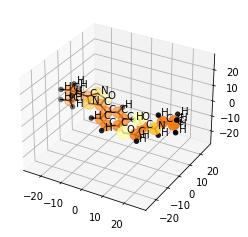

<Figure size 864x576 with 0 Axes>

In [9]:
display_molecule(row, equal_aspect_ratio=True, bond_type=False)

In [10]:
atom_total_bonds = {
    'H': 1,
    'C':4,
    'N':3,
    'O':8,
    'F':1,
    'S':2,
    'Cl':1,
    'Br':1
}

In [11]:
bond_count = bond_matrix.sum(axis=1)
correct_bond_count = np.array([atom_total_bonds[atom] for atom in row.symbols])

less_enough_rows = np.less(bond_count, correct_bond_count).astype('int64')[None, ...]
more_enough_rows = np.greater(bond_count, correct_bond_count).astype('int64')[None, ...]

possible_less_cells = less_enough_rows * less_enough_rows.T * -1 + 1
possible_more_cells = more_enough_rows * more_enough_rows.T

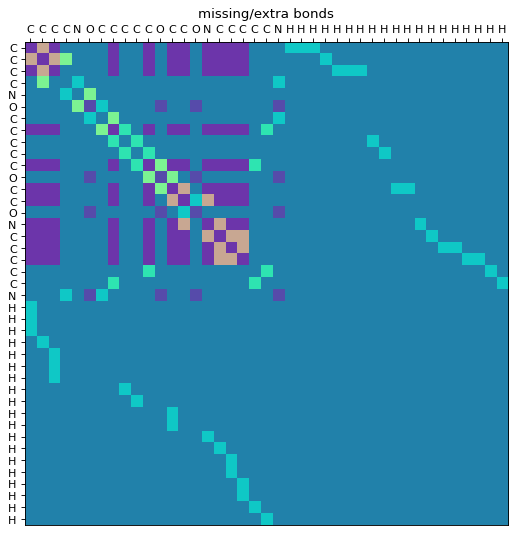

In [33]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)

plt.imshow(bond_matrix)
plt.imshow(possible_less_cells, cmap='cool', alpha=.3)
plt.imshow(possible_more_cells, cmap='cool', alpha=.3)

plt.title('missing/extra bonds')

ax.xaxis.tick_top()
ax.set_xticks(list(range(row.natoms)))
ax.set_xticklabels(row.symbols)
ax.set_yticks(list(range(row.natoms)))
ax.set_yticklabels(row.symbols)

plt.show()

In [ ]:
display_molecule_video(row, bond_type=True, atom_index=True)